In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
xl = pd.ExcelFile('dynamics-4ea27284-7225-454f-b091-ed08eae239b1.xlsx')

In [173]:
## Задание 0

Index(['другое'], dtype='object', name='день')
Index(['супермаркеты'], dtype='object', name='день')


<Axes: xlabel='категории', ylabel='разброс сумм транзакций (СКО) в течение 2021 года'>

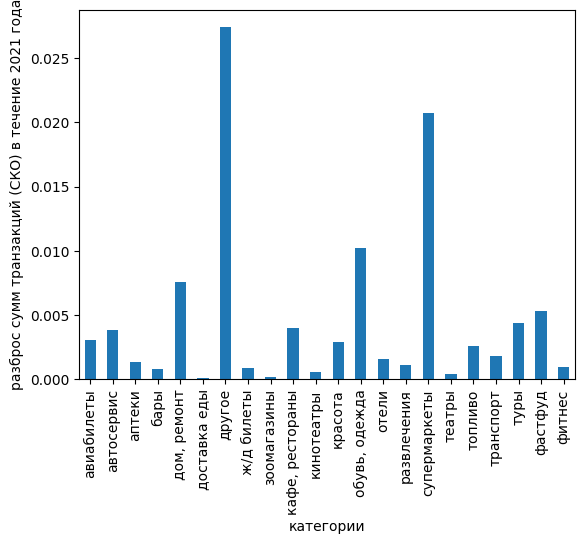

In [5]:
df= xl.parse("по дням", header=[1,1], skiprows=2, index_col=0)
disp_t=df['сумма трат'].loc['2021-01-01':'2021-12-31'].std()
disp_k=df['количество транзакций'].loc['2021-01-01':'2021-12-31'].std()

print(disp_t.index[disp_t==disp_t.max()])
print(disp_k.index[disp_k==disp_k.max()])

# plt.bar(disp.index, disp.values)
disp_t.plot(kind='bar', xlabel='категории', ylabel='разброс сумм транзакций (СКО) в течение 2021 года')

<Axes: xlabel='категории', ylabel='разброс кол-ва транзакций (СКО) в течение 2021 года'>

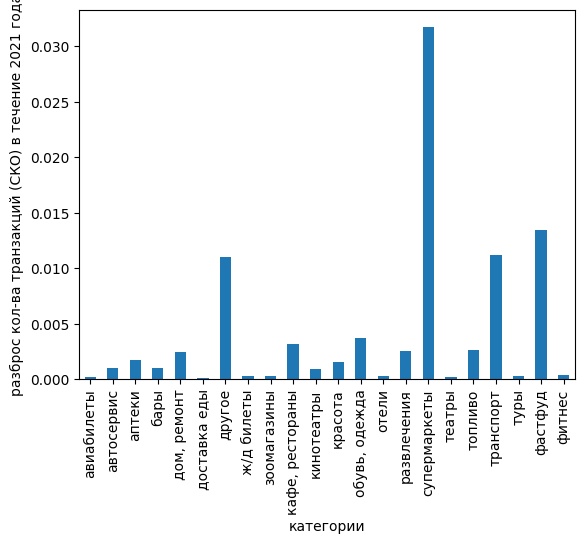

In [6]:
disp_k.plot(kind='bar', xlabel='категории', ylabel='разброс кол-ва транзакций (СКО) в течение 2021 года')

In [4]:
## Задание 1

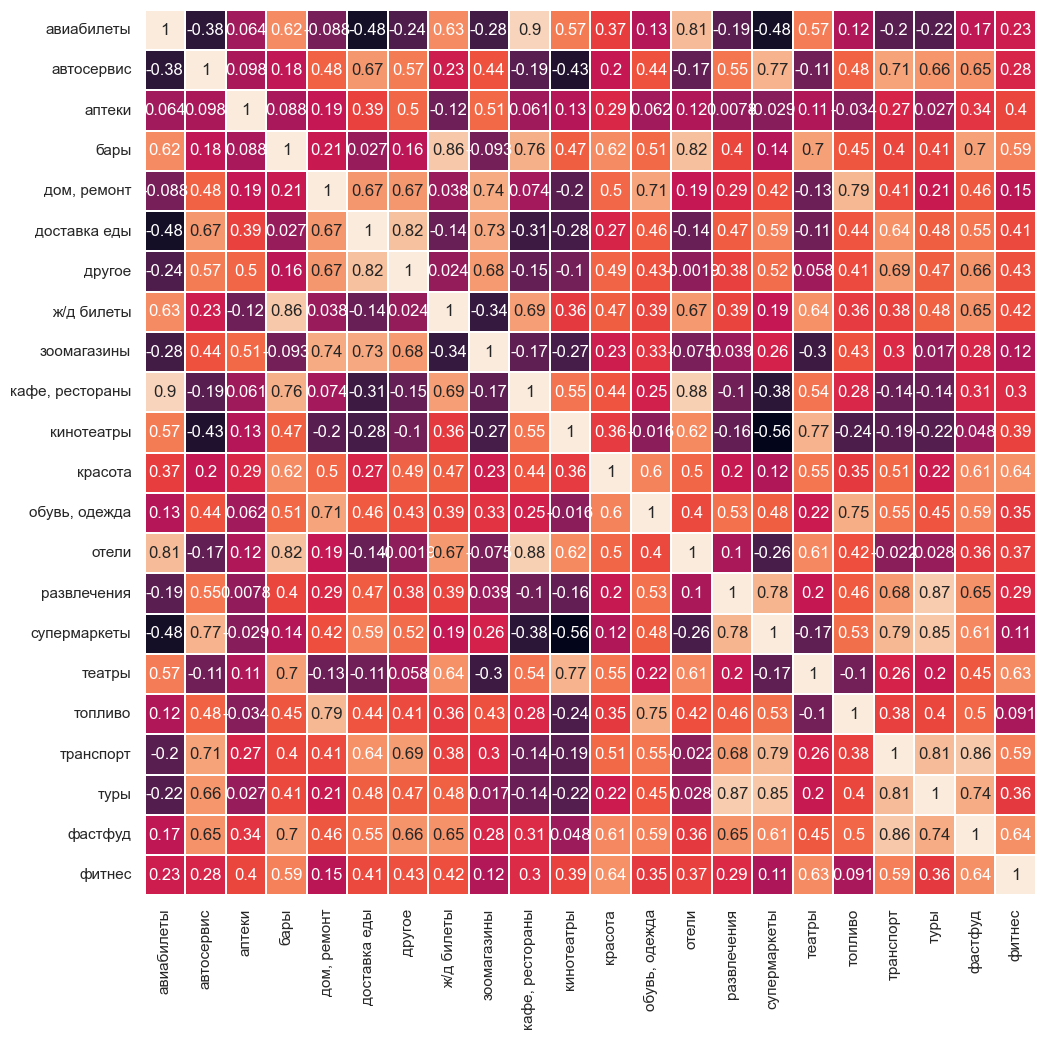

In [177]:
dff= xl.parse("по неделям", header=[1,1], skiprows=2)
df=dff['количество транзакций']
df_corr=df.corr()
pic=sns.heatmap(df_corr, annot=True, linewidths=0.1, fmt='.2g',  cbar=False)
sns.set(rc={'figure.figsize':(11.5,11.5)})

In [178]:
corr_stack=df_corr.stack()
corr_stack=corr_stack[corr_stack.index.get_level_values(0) != corr_stack.index.get_level_values(1)]
sorted_corr=corr_stack.sort_values(ascending=False)
sorted_corr.iloc[::2].head(5)


кафе, рестораны  авиабилеты    0.903777
                 отели         0.879140
развлечения      туры          0.868542
фастфуд          транспорт     0.859040
бары             ж/д билеты    0.858559
dtype: float64

In [179]:
## 1: покупка авиабилетов коррелирует с кафе/ресторанами, тк люди, которые часто летают, вынуждены питаться не дома
## 2: отели коррелируют с кафе/ресторанами, люди, которые часто ездят 
## 3: туры коррелируют с развлечениямм, тк во время отпуска...

In [180]:
#авиабилеты коррелируют с ресторанами, тк люди, оптавляясь в поездку, часто не имеют возможности сами готовить еду, а потому не покупают продукты в супермаркетах, а едят в кафе и ресторанах
#отели коррелируют с кафе и ресторанами, тк люди, оставаясь в них, обычно не готовят себе сами
#развлечения коррелируют с турами, тк людям на отдыхе свойственны траты на различные развлечения

In [181]:
## Задание 2

In [182]:
df= xl.parse("по дням", header=[1,1], skiprows=2, index_col=0)
df_b=df['количество транзакций', 'бары']
df_r=df['количество транзакций', 'кафе, рестораны']
df_o=df['количество транзакций', 'отели']
df_s=df_b+df_r+df_o

<AxesSubplot: >

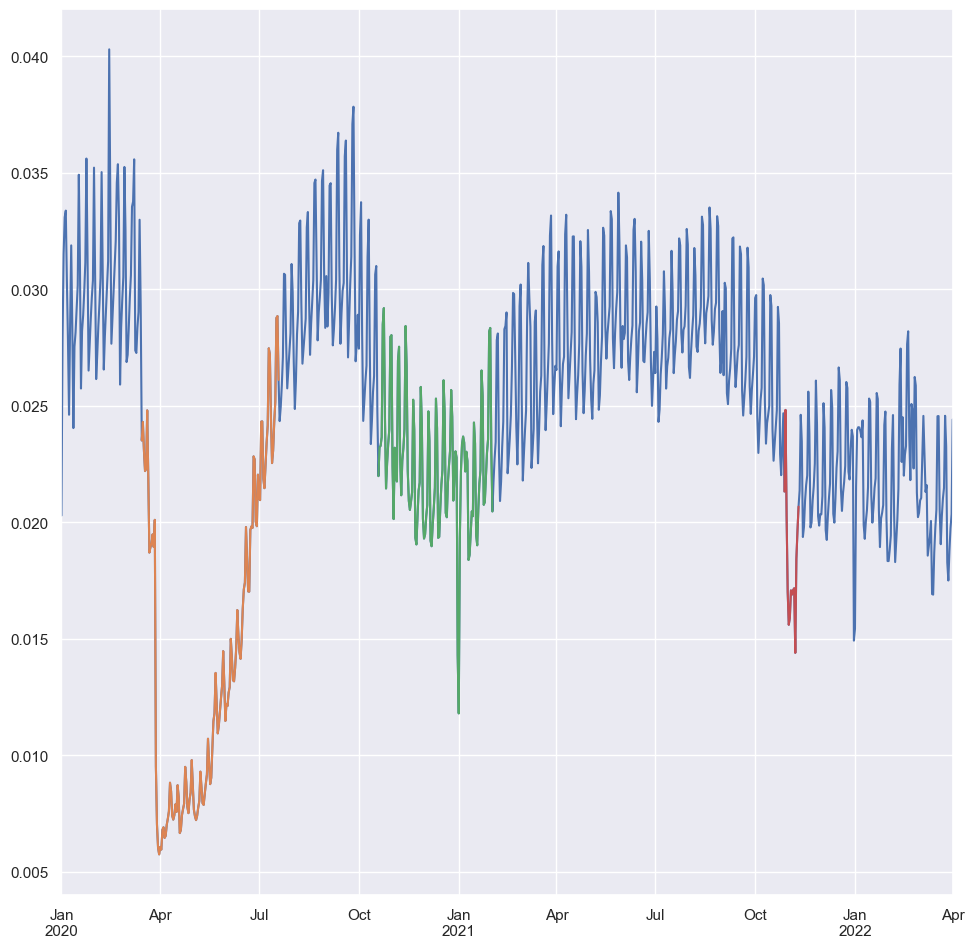

In [194]:
df_s.loc['2020-01-01':'2022-04-01'].plot()
df_s.loc['2020-03-15':'2020-07-19'].plot() 
df_s.loc['2020-10-19':'2021-02-01'].plot()
df_s.loc['2021-10-28':'2021-11-10'].plot()

In [184]:
#15 марта - начало ограничений
#самые серьезные органичения: 28 марта -- 19 июля 20 года  (2020-03-28:2020-07-19)
#19 октября 20 года -- дополнительные ограничения для  ресторанов и баров (qr коды) 
#28 окт 21 - 7 ноя 21 -- работа только на вынос

#есть ощущение, что кол-во транзакций зависит от эпидемилогоческой обстановки, а не ограничений

In [185]:
df_tr=df['средний чек'].mean(axis=1)
# df_tr.plot()
all_19=df_tr.loc['2019-01-01':'2019-12-31']
all_20=df_tr.loc['2020-01-01':'2020-12-31']
all_21=df_tr.loc['2021-01-01':'2021-12-31']
df19=df_tr.loc['2019-12-10':'2019-12-31']
df20=df_tr.loc['2020-12-10':'2020-12-31']
df21=df_tr.loc['2021-12-10':'2021-12-31']

mean_19=all_19.mean()
mean_20=all_20.mean()
mean_21=all_21.mean()
mean_d19=df19.mean()
mean_d20=df20.mean()
mean_d21=df21.mean()

print('средний чек в течение 2019 года:', '{0:.2f}'.format(mean_19))
print('средний чек перед НГ 2020:', '{0:.2f}'.format(mean_d19))
print('средний чек в течение 2020 года:', '{0:.2f}'.format(mean_20))
print('средний чек перед НГ 2021:', '{0:.2f}'.format(mean_d20))
print('средний чек в течение 2021 года:', '{0:.2f}'.format(mean_21))
print('средний чек перед НГ 2022:', '{0:.2f}'.format(mean_d21))


средний чек в течение 2019 года: 3101.83
средний чек перед НГ 2020: 2950.80
средний чек в течение 2020 года: 2517.06
средний чек перед НГ 2021: 2540.11
средний чек в течение 2021 года: 2703.10
средний чек перед НГ 2022: 2808.83


<AxesSubplot: >

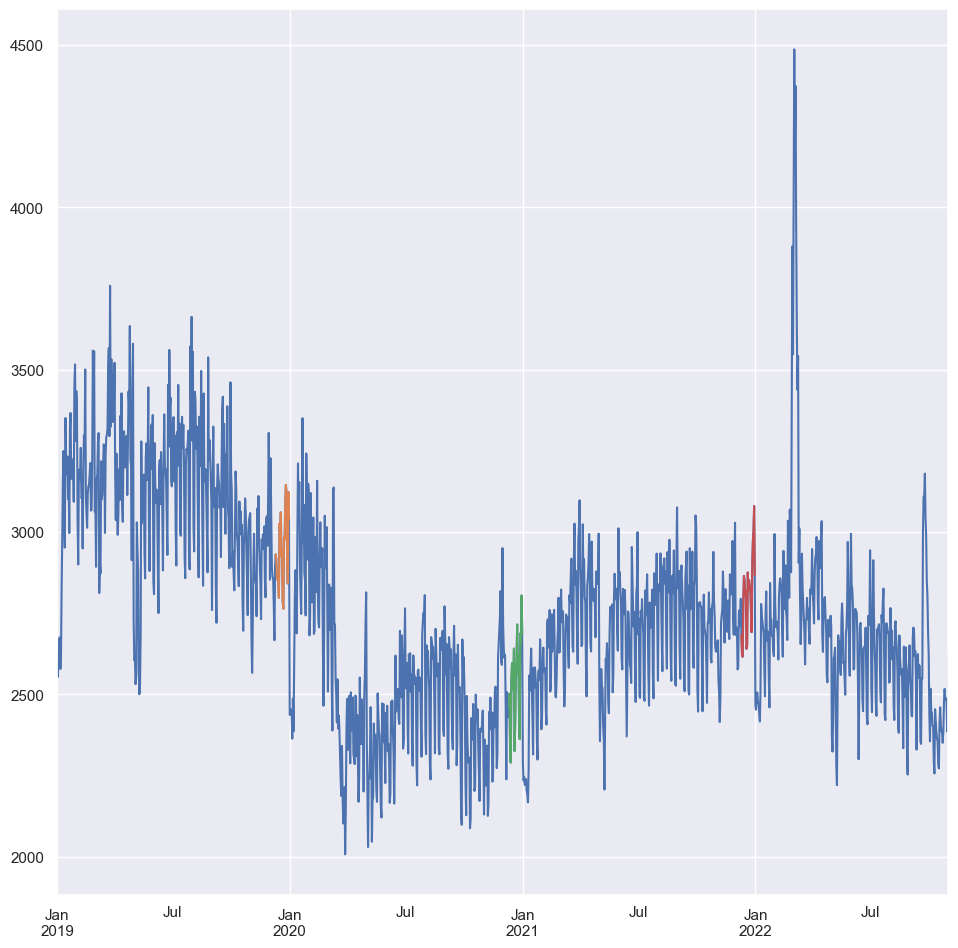

In [186]:
df_tr.plot()
df19.plot()
df20.plot()
df21.plot()

In [187]:
# гипотеза опровергнута

In [188]:
df= xl.parse("по месяцам", header=[1,1], skiprows=0, index_col=0)

In [189]:
df_f=df['сумма трат','фитнес']

траты в категории финтес в среднем за 2019 год: 0.00445
траты в категории фитнес за весну 2019 года: 0.00427
траты в категории финтес в среднем за 2020 год: 0.00325
траты в категории фитнес за весну 2020 года: 0.00138
траты в категории финтес в среднем за 2021 год: 0.00461
траты в категории фитнес за весну 2021 года: 0.00490


<AxesSubplot: >

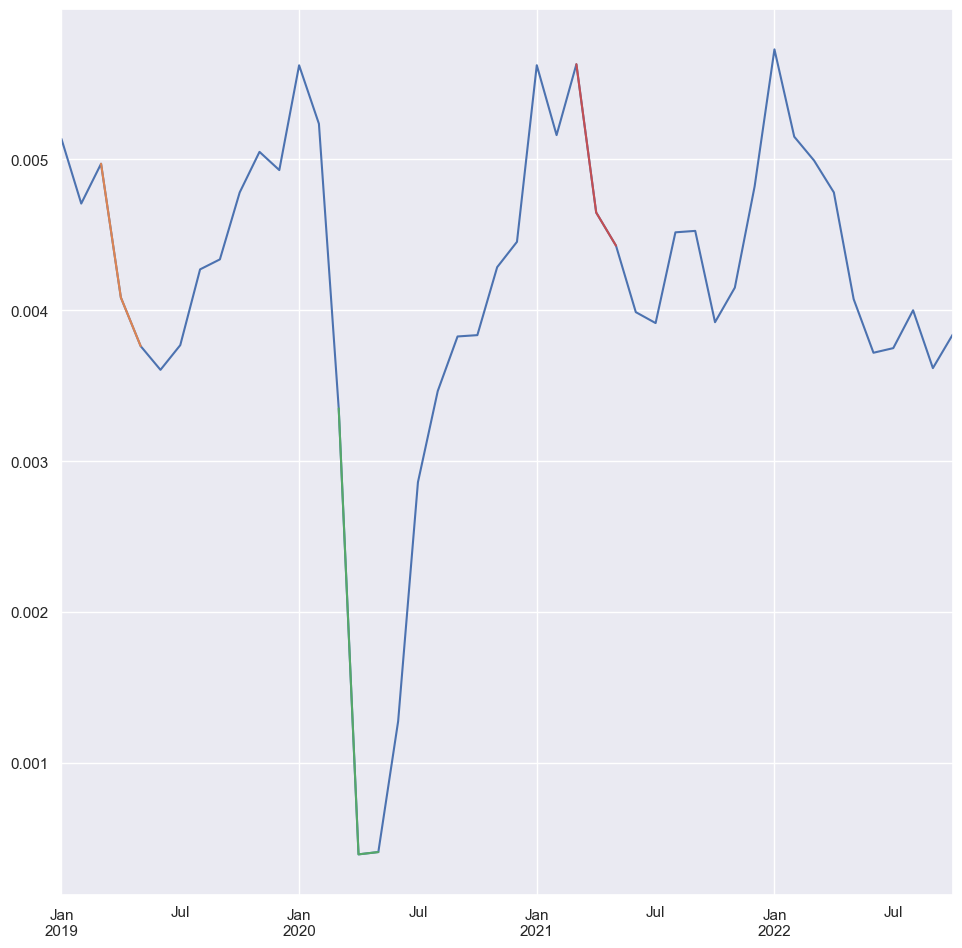

In [190]:

sp_19=df_f.loc['2019-03-01':'2019-05-30']
sp_20=df_f.loc['2020-03-01':'2020-05-30']
sp_21=df_f.loc['2021-03-01':'2021-05-30']
df_19=df_f.loc['2019-01-01':'2019-12-31']
df_20=df_f.loc['2020-01-01':'2020-12-31']
df_21=df_f.loc['2021-01-01':'2021-12-31']

mean19=df_19.mean()
mean20=df_20.mean()
mean21=df_21.mean()
mean_sp19=sp_19.mean()
mean_sp20=sp_20.mean()
mean_sp21=sp_21.mean()

print('траты в категории финтес в среднем за 2019 год:', '{0:.5f}'.format(mean19))
print('траты в категории фитнес за весну 2019 года:', '{0:.5f}'.format(mean_sp19))

print('траты в категории финтес в среднем за 2020 год:', '{0:.5f}'.format(mean20))
print('траты в категории фитнес за весну 2020 года:', '{0:.5f}'.format(mean_sp20))

print('траты в категории финтес в среднем за 2021 год:', '{0:.5f}'.format(mean21))
print('траты в категории фитнес за весну 2021 года:', '{0:.5f}'.format(mean_sp21))

df_f.plot()
sp_19.plot()
sp_20.plot()
sp_21.plot()